In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_reviews = pd.read_csv("archive/RAW_interactions.csv")
df_reviews.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [3]:
num_users = len(df_reviews["user_id"].unique())
print("Number of Users:",num_users)

num_recipes_reviewed = len(df_reviews["recipe_id"].unique())
print("Number of Recipes Reviewed:",num_recipes_reviewed)

Number of Users: 226570
Number of Recipes Reviewed: 231637


Average Rating:  4.411016039852804


user_id                 int64
recipe_id               int64
date           datetime64[ns]
rating                  int64
review                 object
year                    int64
month                   int64
day                     int64
day_of_week             int64
dtype: object

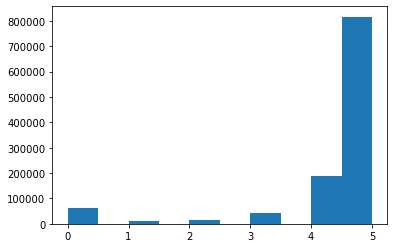

In [25]:
# Include this graphic in paper
plt.hist(df_reviews["rating"])
print("Average Rating: ", df_reviews["rating"].mean())
df_reviews.dtypes

(array([ 30507.,    170.,   6508.,    526.,   4423.,   3165.,   8327.,
          3813.,  28709., 140422.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

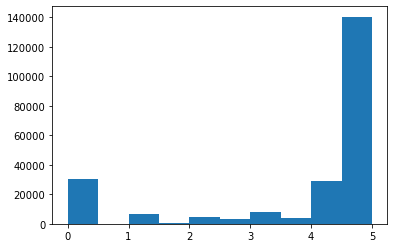

In [5]:
grouped = df_reviews.groupby(by="user_id")
averages = grouped.mean()
plt.hist(averages["rating"])

(array([2.31292e+05, 2.49000e+02, 4.60000e+01, 2.20000e+01, 1.50000e+01,
        4.00000e+00, 1.00000e+00, 2.00000e+00, 3.00000e+00, 3.00000e+00]),
 array([   0. ,  160.9,  321.8,  482.7,  643.6,  804.5,  965.4, 1126.3,
        1287.2, 1448.1, 1609. ]),
 <BarContainer object of 10 artists>)

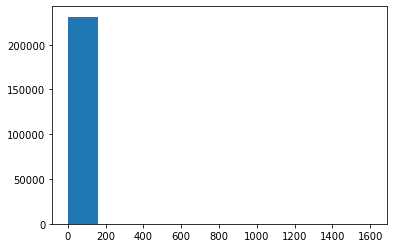

In [36]:
review_per_user = grouped.count()
#plt.hist(review_per_user["review"][100:])
plt.hist(review_per_user["review"])

# make x axis 0-500 (remove outliers)

In [40]:
review_per_user[review_per_user["review"]>3].shape

(28228, 4)

In [7]:
most_reviews_by_user = review_per_user["review"].max()
print("Most reviews by a user:", most_reviews_by_user)
median_reviews_by_user = review_per_user["review"].median()
print("Median reviews by a user:", median_reviews_by_user)
mean_reviews_by_user = review_per_user["review"].mean()
print("Mean reviews by a user:",mean_reviews_by_user)

Most reviews by a user: 7671
Median reviews by a user: 1.0
Mean reviews by a user: 4.997122302158274


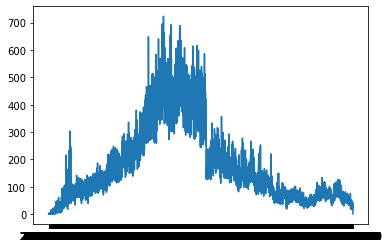

In [14]:
plt.plot(grouped_date.axes[0].tolist(), grouped_date["review"])

In [8]:
grouped_date = df_reviews.groupby(by="date").count()
idx_day_most_reviews = grouped_date["review"].idxmax()
day_w_most_most_reviews = grouped_date.loc[idx_day_most_reviews]
date = day_w_most_most_reviews.name


print("The date that had the most reviews is:", date)
print("It has", grouped_date["review"].max(), "reviews")

The date that had the most reviews is: 2008-01-27
It has 723 reviews


(array([  2698.,  48791.,  98441., 192459., 311317., 212894., 114508.,
         66545.,  39164.,  45550.]),
 array([10981. , 11671.4, 12361.8, 13052.2, 13742.6, 14433. , 15123.4,
        15813.8, 16504.2, 17194.6, 17885. ]),
 <BarContainer object of 10 artists>)

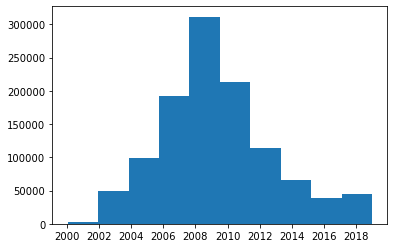

In [26]:
df_reviews['date']= pd.to_datetime(df_reviews['date'],format='%Y-%m-%d')
df_reviews['day_of_week'] = df_reviews['date'].dt.dayofweek
plt.hist(df_reviews["date"])

(array([202145.,  98245.,  93883.,  89504.,  97027.,  91356.,  88766.,
         89063.,  95018., 187360.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

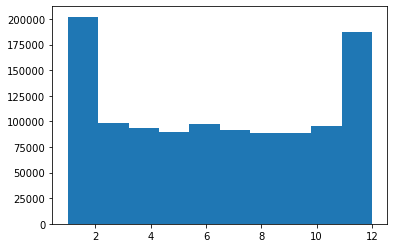

In [10]:
df_reviews['year']= df_reviews['date'].dt.year
df_reviews['month']= df_reviews['date'].dt.month
df_reviews['day']= df_reviews['date'].dt.day

plt.hist(df_reviews["month"])

(array([  3012.,  53883., 112593., 230952., 167295., 266854., 128557.,
         79991.,  41521.,  47709.]),
 array([2000. , 2001.8, 2003.6, 2005.4, 2007.2, 2009. , 2010.8, 2012.6,
        2014.4, 2016.2, 2018. ]),
 <BarContainer object of 10 artists>)

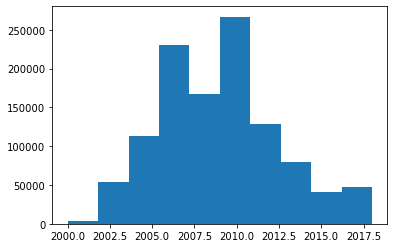

In [11]:
plt.hist(df_reviews["year"])

(array([112548., 113081., 111711., 111344., 109565., 110014., 110504.,
        112389., 113050., 128161.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

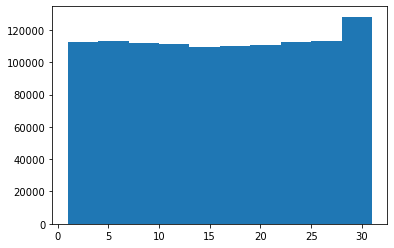

In [12]:
plt.hist(df_reviews["day"])

array([0, 2, 6, 5, 4, 3, 1])

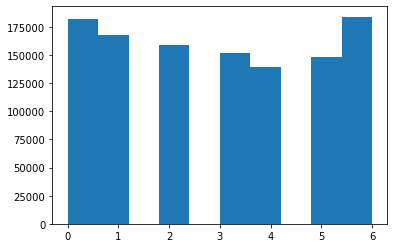

In [21]:
plt.hist(df_reviews["day_of_week"])
df_reviews["day_of_week"].unique()

In [18]:
df_recipes = pd.read_csv("archive/RAW_recipes.csv")
df_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


## Baselines

In [32]:
#df_reviews.groupby(by = "id")
grouped_recipe = df_reviews.groupby(by="recipe_id")
recipe_rating_dict = grouped_recipe["rating"].mean().to_dict()
recipe_id_list = df_recipes["id"].to_list()
id_to_recipe_name = dict(zip(recipe_id_list,df_recipes["name"].to_list()))
all_recipes_avg = df_reviews["rating"].mean()


def would_rate(recipe_id, avg_rating):
    if recipe_rating_dict[recipe_id] >= avg_rating:
        return 1
    return 0
would_rate_dict = {rid: would_rate(rid, all_recipes_avg) for rid in recipe_id_list}


# Add MSE and accuracy
# 

In [33]:
would_rate_dict

{137739: 1,
 31490: 0,
 112140: 0,
 59389: 1,
 44061: 1,
 5289: 1,
 25274: 0,
 67888: 1,
 70971: 1,
 75452: 0,
 109439: 0,
 42198: 0,
 67547: 0,
 107517: 1,
 39959: 1,
 63986: 0,
 43026: 0,
 23933: 1,
 8559: 0,
 23850: 1,
 76808: 1,
 24701: 0,
 83873: 0,
 107699: 0,
 49262: 0,
 48156: 1,
 54272: 1,
 47366: 0,
 37073: 1,
 44123: 1,
 27087: 0,
 59952: 1,
 93249: 0,
 54100: 1,
 67664: 1,
 87098: 1,
 25775: 0,
 33165: 1,
 38798: 0,
 22123: 1,
 90921: 0,
 93959: 1,
 93958: 1,
 58224: 0,
 33606: 1,
 94710: 1,
 35173: 0,
 83025: 0,
 52804: 0,
 108414: 1,
 26995: 0,
 53402: 0,
 59632: 0,
 22526: 1,
 100870: 0,
 84797: 0,
 35653: 1,
 32169: 1,
 24478: 1,
 44045: 1,
 60219: 0,
 81185: 1,
 30131: 1,
 63593: 0,
 43164: 0,
 30300: 1,
 78655: 0,
 74805: 1,
 71635: 0,
 38276: 0,
 97052: 1,
 26835: 0,
 32271: 0,
 107229: 1,
 5060: 0,
 42570: 1,
 52443: 0,
 35595: 0,
 108804: 1,
 83950: 0,
 19208: 1,
 64302: 0,
 35964: 0,
 71457: 0,
 95926: 0,
 103948: 0,
 99024: 1,
 64045: 1,
 41756: 1,
 112959: 0,
 8

In [35]:
id_to_recipe_name[107517]

'boat house  collard greens'